In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pprint import pprint

In [3]:
def wrap_around(i, size):
    """Helper function, to wrap indicies around a grid. Only works for square matrices."""
    return i % size


def flatten(a):
    """Flatten a n dimensional array into a n-1 dimensional array."""
    return a.reshape(-1, a.shape[-1])
    

def lookup(space, grid):
    """Helper function to look up a value in a given grid. Takes an array with an x and y coordinate."""
    return grid[tuple(space)]


def find_spaces(grid, value):
    """Helper function to find indices of a specific value."""
    return np.argwhere(grid == value)


def adjacent(space):
    """Calculates the indices of the adjacent spaces"""
    return flatten(np.array([space + np.array(adj) for adj in [[-1, 0], [0, 1], [1, 0], [0, -1]]]))


def get_subgrid(grid, origin, size=(7, 7)):
    x_size, y_size = grid.shape
    x_origin, y_origin = origin

    x_offset = int(size[0] / 2 if size[0] % 2 == 0 else (size[0] - 1) / 2)
    y_offset = int(size[1] / 2 if size[1] % 2 == 0 else (size[1] - 1) / 2)
    
    x_indices = wrap_around(np.arange(x_origin - x_offset, x_origin + x_offset + 1, dtype='int8'), x_size)
    y_indices = wrap_around(np.arange(y_origin - y_offset, y_origin + y_offset + 1, dtype='int8'), y_size)
    
    subgrid = np.zeros(size, dtype='int8')
    index_grid = np.zeros((size[0], size[1], 2), dtype='int8')

    for i, x in enumerate(x_indices):
        for j, y in enumerate(y_indices):
            subgrid[i, j] = grid[x, y]
            index_grid[i, j] = np.array([x, y])

    return subgrid, index_grid

Yellow is Closed, Purple is Open
Samples in dataset: 178
Dark: Open, Yellow: Closed, Green: Private


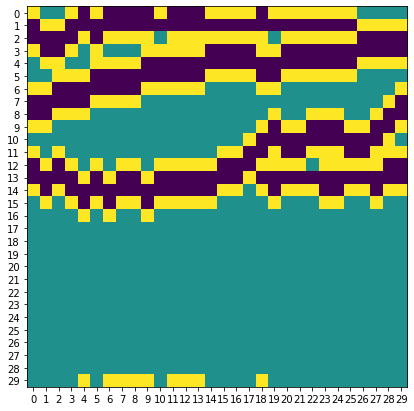

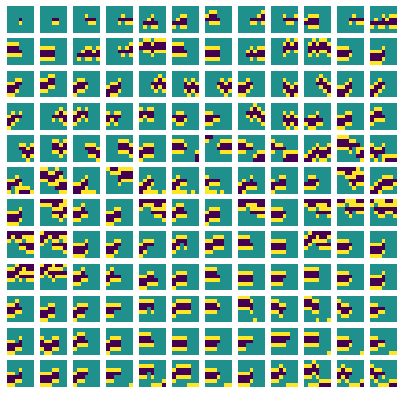

In [101]:
# the samples will then be fed to a svm for classification
x_row = []

# INITIALIZATION
# -- constants
AGGREGATION = "row"
GRID_SIZE = 30
ORIENTATIONS = [[-1, 0], [1, 0]]  # -- only allow vertical orientations in row mode.  #[[0, 1], [0, 1],  [0, -1] [0, -1]

# -- initialize empty grid
grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype="int8")

# -- start with a random location.
start_position = np.random.randint(0, GRID_SIZE, size=2)# np.array([29, 6]) # 
start_orientation = wrap_around(start_position + np.random.permutation(ORIENTATIONS)[0], GRID_SIZE)

# -- apply start location
grid[tuple(start_position)] = -1
grid[tuple(start_orientation)] = 1 

# -- Save a copy of the subgrid for the d
# -- Save a copy of the subgrid for the dataset
subgrid, index_grid = get_subgrid(grid, start_position)
x_row.append(subgrid)


def row_adjacent(space):
    """Calculates the indices of the adjacent spaces"""
    return flatten(np.array([space + np.array(adj) for adj in [[-1, 0], [1, 0]]]))


def col_adjacent(space):
    """Calculates the indices of the adjacent spaces"""
    return flatten(np.array([space + np.array(adj) for adj in [[0, -1], [0, 1]]]))


def find_closed(space, grid):
    adjacents = wrap_around(adjacent(space), grid.shape[0])

    for adj in adjacents:
        if lookup(adj, grid) == 1:
            return adj


def find_positions(space, grid):
    adjacents = wrap_around(adjacent(space), grid.shape[0])
    return [adj for adj in adjacents if lookup(adj, grid) == 0]


def find_orientations(positions, grid):
    adjacents_pp = [wrap_around(row_adjacent(position), grid.shape[0]) for position in positions]
    return [[adj for adj in adjacents if lookup(adj, grid) == 0] for adjacents in adjacents_pp]


def filter_for_row_aggr(orientations_pp, positions, grid):
    f_orientations_pp = []
    
    for orientations in orientations_pp:

        f_orientations = []
        
        for orientation in orientations:
            adjacents = wrap_around(adjacent(space), grid.shape[0])
            next_to_position = []

            for adj_x, adj_y in adjacents:
                for pos_x, pos_y in positions:
                    next_to_position.append(False if pos_x == adj_x and pos_y == adj_y else True)
            
            if not np.all(next_to_position):
                f_orientations.append(orientation)

        f_orientations_pp.append(f_orientations)
    return f_orientations_pp

# INTERATION, RANDOM AGGREGATION
STEPS = 450

for i in range(STEPS):
    next_moves = []

    for space in find_spaces(grid, -1):
        positions = find_positions(space, grid)
        orientations = filter_for_row_aggr(find_orientations(positions, grid), positions, grid)

        next_moves += list(zip(positions, orientations))

    # pprint(next_moves)
    # print('moves:', np.array(next_moves).shape)

    for position, orientations in np.random.permutation(next_moves):
        if len(orientations) > 0:
            open_space = tuple(position)
            clsd_space = tuple(np.random.permutation(orientations)[0])

            grid[open_space] = -1
            grid[clsd_space] = 1
            
            subgrid, index_grid = get_subgrid(grid, position)
            x_row.append(subgrid)
            break
    

print('Yellow is Closed, Purple is Open')
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.imshow(grid)
ax.set_xticks(np.arange(0, GRID_SIZE))
ax.set_yticks(np.arange(0, GRID_SIZE))

# -- print dataset samples
fig, axs = plt.subplots(12, 12, figsize=(7,7))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(x_row[i])
    ax.set_xticks(np.arange(0, 7))
    ax.set_yticks(np.arange(0, 7))
    ax.axis('off')

plt.savefig('row_samples.png')
print("Samples in dataset:", len(x_row))
print('Dark: Open, Yellow: Closed, Green: Private')

In [88]:
def flatten1st(arr):
    return arr.reshape(-1, *arr.shape[2:])


flatten1stD(np.zeros((3, 4, 5))).shape

(12, 5)

In [40]:
[0,1] in [[0, 1], [1, 0]]

True

In [35]:
grid[tuple([29, 3])] == 1

True

In [57]:
np.all([True, True, True])

True